In [1]:
!pip install timm

You should consider upgrading via the 'C:\Users\lkk68\.conda\envs\mycondapy39\python.exe -m pip install --upgrade pip' command.


In [2]:
import timm
m = timm.create_model('mobilenetv3_large_100', pretrained=True)
m.eval() #The returned PyTorch model is set to train mode by default

C:\Users\lkk68\.conda\envs\mycondapy39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_large_100_ra-f55367f5.pth" to C:\Users\lkk68/.cache\torch\hub\checkpoints\mobilenetv3_large_100_ra-f55367f5.pth


MobileNetV3(
  (conv_stem): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (bn1): BatchNormAct2d(
    16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
    (drop): Identity()
    (act): Hardswish()
  )
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
        (bn1): BatchNormAct2d(
          16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): ReLU(inplace=True)
        )
        (se): Identity()
        (conv_pw): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNormAct2d(
          16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
        (drop_path): Identity()
      )
    )
    (1): Sequential(
      (0): InvertedResidual(
 

In [3]:
m.pretrained_cfg

{'url': 'https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/mobilenetv3_large_100_ra-f55367f5.pth',
 'num_classes': 1000,
 'input_size': (3, 224, 224),
 'pool_size': (7, 7),
 'crop_pct': 0.875,
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'first_conv': 'conv_stem',
 'classifier': 'classifier',
 'architecture': 'mobilenetv3_large_100'}

In [5]:
data_cfg = timm.data.resolve_data_config(m.pretrained_cfg)

In [6]:
transform = timm.data.create_transform(**data_cfg)

In [7]:
transform

Compose(
    Resize(size=256, interpolation=bicubic, max_size=None, antialias=warn)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

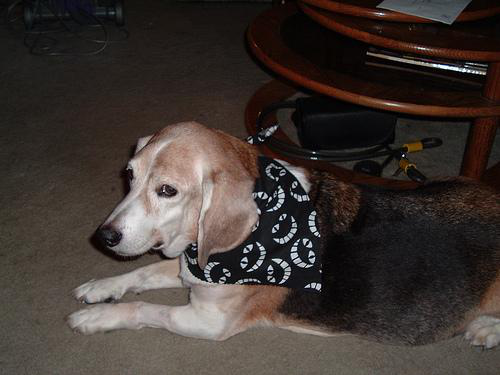

In [8]:
import requests
from PIL import Image
from io import BytesIO
url = 'https://datasets-server.huggingface.co/assets/imagenet-1k/--/default/test/12/image/image.jpg'
image = Image.open(requests.get(url, stream=True).raw)
image

In [9]:
model = timm.create_model('mobilenetv3_large_100', pretrained=True).eval()
transform = timm.data.create_transform(**timm.data.resolve_data_config(model.pretrained_cfg))

In [10]:
image_tensor = transform(image)
image_tensor.shape

torch.Size([3, 224, 224])

In [11]:
output = model(image_tensor.unsqueeze(0))
output.shape

torch.Size([1, 1000])

In [13]:
import torch

In [14]:
probabilities = torch.nn.functional.softmax(output[0], dim=0)
probabilities.shape

torch.Size([1000])

In [15]:
values, indices = torch.topk(probabilities, 5)

In [16]:
indices

tensor([162, 166, 161, 164, 167])

In [17]:
values

tensor([0.8486, 0.0375, 0.0246, 0.0103, 0.0070], grad_fn=<TopkBackward0>)

In [18]:
IMAGENET_1k_URL = 'https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt'
IMAGENET_1k_LABELS = requests.get(IMAGENET_1k_URL).text.strip().split('\n')

In [19]:
IMAGENET_1k_LABELS

['tench, Tinca_tinca',
 'goldfish, Carassius_auratus',
 'great_white_shark, white_shark, man-eater, man-eating_shark, Carcharodon_carcharias',
 'tiger_shark, Galeocerdo_cuvieri',
 'hammerhead, hammerhead_shark',
 'electric_ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio_camelus',
 'brambling, Fringilla_montifringilla',
 'goldfinch, Carduelis_carduelis',
 'house_finch, linnet, Carpodacus_mexicanus',
 'junco, snowbird',
 'indigo_bunting, indigo_finch, indigo_bird, Passerina_cyanea',
 'robin, American_robin, Turdus_migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water_ouzel, dipper',
 'kite',
 'bald_eagle, American_eagle, Haliaeetus_leucocephalus',
 'vulture',
 'great_grey_owl, great_gray_owl, Strix_nebulosa',
 'European_fire_salamander, Salamandra_salamandra',
 'common_newt, Triturus_vulgaris',
 'eft',
 'spotted_salamander, Ambystoma_maculatum',
 'axolotl, mud_puppy, Ambystoma_mexicanum',
 'bullfrog, Rana_catesbeiana',
 'tree_frog, tree-f

In [20]:
[{'label': IMAGENET_1k_LABELS[idx], 'value': val.item()} for val, idx in zip(values, indices)]

[{'label': 'beagle', 'value': 0.8486220836639404},
 {'label': 'Walker_hound, Walker_foxhound', 'value': 0.03753994405269623},
 {'label': 'basset, basset_hound', 'value': 0.024628549814224243},
 {'label': 'bluetick', 'value': 0.010317106731235981},
 {'label': 'English_foxhound', 'value': 0.006958033423870802}]

In [22]:
model=timm.create_model('resnet50d', pretrained=True, features_only=True)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet50d_ra2-464e36ba.pth" to C:\Users\lkk68/.cache\torch\hub\checkpoints\resnet50d_ra2-464e36ba.pth


In [23]:
model.feature_info.module_name()

['act1', 'layer1', 'layer2', 'layer3', 'layer4']

In [24]:
model.feature_info.reduction()

[2, 4, 8, 16, 32]

In [25]:
model.feature_info.channels()

[64, 256, 512, 1024, 2048]

In [27]:
out=model(image_tensor.unsqueeze(0))

In [29]:
len(out)

5

In [30]:
for o in out:
    print(o.shape)

torch.Size([1, 64, 112, 112])
torch.Size([1, 256, 56, 56])
torch.Size([1, 512, 28, 28])
torch.Size([1, 1024, 14, 14])
torch.Size([1, 2048, 7, 7])


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

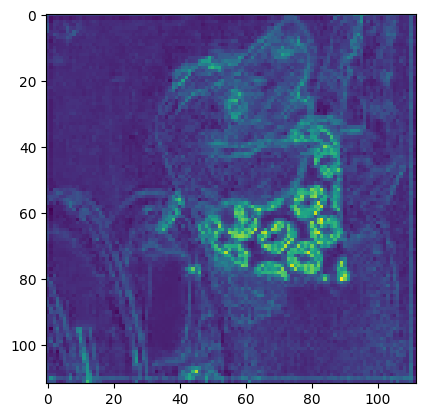

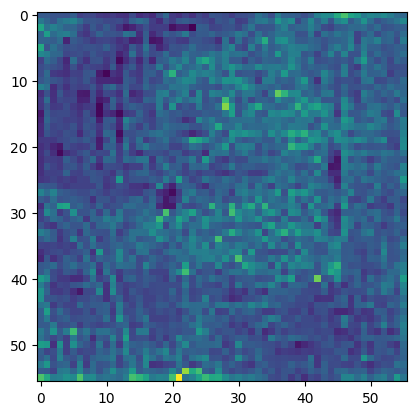

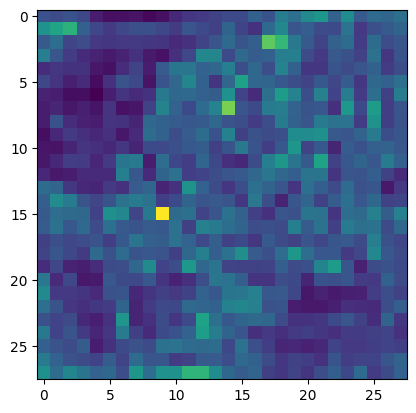

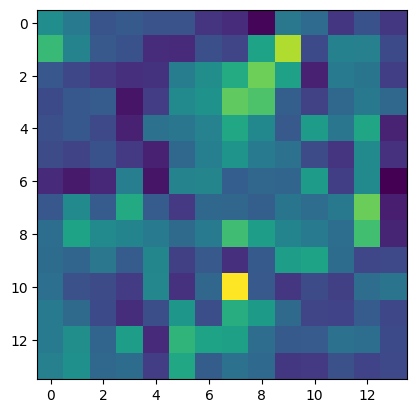

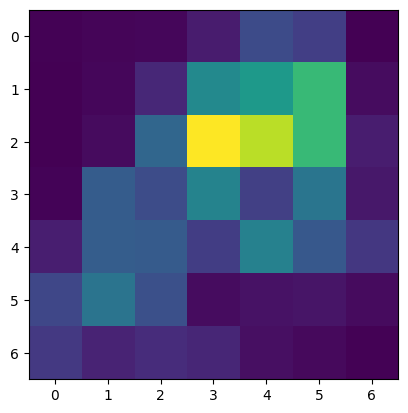

In [33]:
for o in out:
    plt.imshow(o[0].transpose(0,2).sum(-1).detach().numpy())
    plt.show()

In [34]:
model_out=timm.create_model('resnet50d', pretrained=True, exportable=True)
model_out.eval()

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Co

In [35]:
x =torch.randn(2,3,224,224, requires_grad=True)
torch_out=model_out(x)

In [36]:
torch_out

tensor([[-0.0043, -0.0592,  0.0288,  ..., -0.1592,  0.0339, -0.2244],
        [-0.0021, -0.0963,  0.0119,  ..., -0.1583, -0.0058, -0.2248]],
       grad_fn=<AddmmBackward0>)

In [38]:
!pip install onnx

You should consider upgrading via the 'C:\Users\lkk68\.conda\envs\mycondapy39\python.exe -m pip install --upgrade pip' command.


In [39]:
torch.onnx.export(model_out, x, "resnet50d.onnx", export_params=True, opset_version=10,do_constant_folding=True,
                  input_names = ['input'],
                 output_names=['output'],
                 dynamic_axes={'input': {0: 'batch_size'},
                              'output': {0: 'batch_size'}})

================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [41]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 5603-1EBA

 Directory of C:\Users\lkk68\Documents\GitHub\DeepDataMiningLearning\pytorch

03/22/2023  01:43 PM    <DIR>          .
03/22/2023  01:29 PM    <DIR>          ..
03/21/2023  08:44 PM    <DIR>          .ipynb_checkpoints
03/21/2023  08:59 PM            21,167 imagenet.py
03/21/2023  02:37 PM             9,777 multiGPU.py
03/21/2023  02:37 PM           207,817 Pytorch-3.ipynb
03/21/2023  08:59 PM             9,120 Pytorch-HPC.ipynb
03/22/2023  01:43 PM       102,224,431 resnet50d.onnx
03/21/2023  02:37 PM             6,265 singleGPU.py
03/22/2023  01:42 PM           529,705 testtimm.ipynb
03/21/2023  02:37 PM             6,166 testTorchDDP.py
03/21/2023  02:37 PM             1,834 torchdata.py
               9 File(s)    103,016,282 bytes
               3 Dir(s)  164,500,197,376 bytes free


In [42]:
import onnx
onnx_model = onnx.load("resnet50d.onnx")

In [43]:
onnx.checker.check_model(onnx_model)

In [44]:
traced_model=torch.jit.trace(model_out, torch.rand(8,3,224,224))

In [45]:
type(traced_model)

torch.jit._trace.TopLevelTracedModule

In [46]:
traced_output=traced_model(torch.rand(8,3,224,224))

In [47]:
traced_output.shape

torch.Size([8, 1000])

In [50]:
from timm.data import create_dataset, create_loader, resolve_data_config

In [53]:
from timm.data import ImageNetInfo

ImportError: cannot import name 'ImageNetInfo' from 'timm.data' (C:\Users\lkk68\.conda\envs\mycondapy39\lib\site-packages\timm\data\__init__.py)

In [54]:
from abc import ABC

In [55]:
from timm.layers import apply_test_time_pool

ModuleNotFoundError: No module named 'timm.layers'